In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models


In [2]:
lgMh = np.vstack(np.load("../../../data/MW-analog/meta_data_psi4/models.npz")["mass"])

lgMs = jsm_SHMR.general([10.5, 2.0, 0.2, 0, 0, 0], lgMh, 0, 1) # sample sigma 5 times!

In [3]:
binz = np.linspace(4.5, 10.5, 40)
binz[1]-binz[0]

0.1538461538461542

In [49]:
binz = np.linspace(5, 10, 40)
bincenters = (binz[:-1] + binz[1:]) / 2

countz = np.apply_along_axis(jsm_stats.count, 1, lgMs, binz)
cumulative = np.apply_along_axis(jsm_stats.cumulative, 1, lgMs, binz)

In [50]:
count_stats = np.percentile(countz[0:100], np.array([16, 50, 84]), axis=0, method="closest_observation")

cumulative_stats = np.percentile(cumulative[0:100], np.array([15, 50, 84]), axis=0, method="closest_observation")

In [63]:
stack_counts = np.sum(countz[0:27], axis=0)
stack_cumulative = np.sum(cumulative[0:27], axis=0)

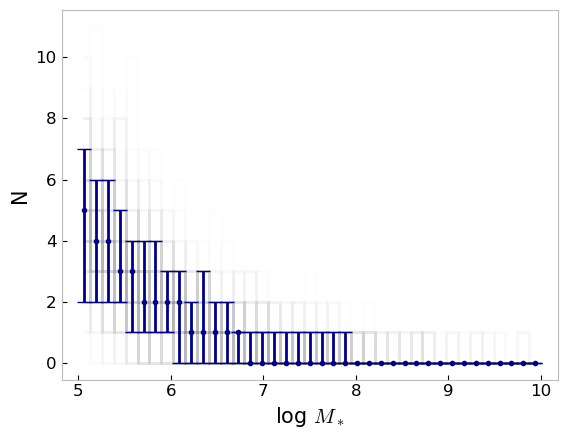

In [51]:
for i in range(100):
    plt.step(bincenters, countz[i], color="grey", alpha=0.01,  where="mid")
plt.errorbar(bincenters, count_stats[1], yerr=[count_stats[1]-count_stats[0], count_stats[2]-count_stats[1]], color="darkblue", fmt=".", capsize=5)
plt.xlabel("log $M_*$", fontsize=15)
plt.ylabel("N", fontsize=15)
plt.show()

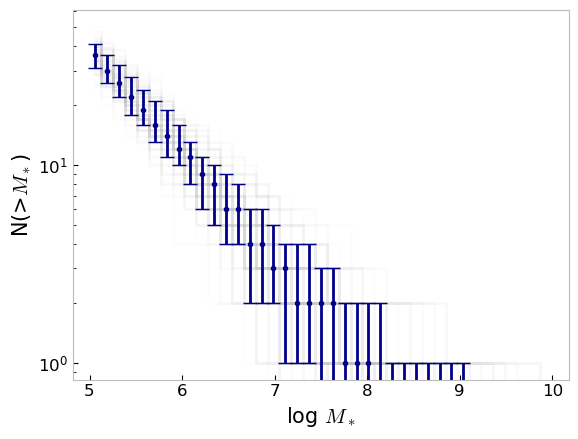

In [52]:
for i in range(100):
    plt.step(bincenters, cumulative[i], color="grey", alpha=0.01,  where="mid")
plt.errorbar(bincenters, cumulative_stats[1], yerr=[cumulative_stats[1]-cumulative_stats[0], cumulative_stats[2]-cumulative_stats[1]], color="darkblue", fmt=".", capsize=5)
plt.yscale("log")
plt.xlabel("log $M_*$", fontsize=15)
plt.ylabel("N(>$M_*$)", fontsize=15)
plt.show()

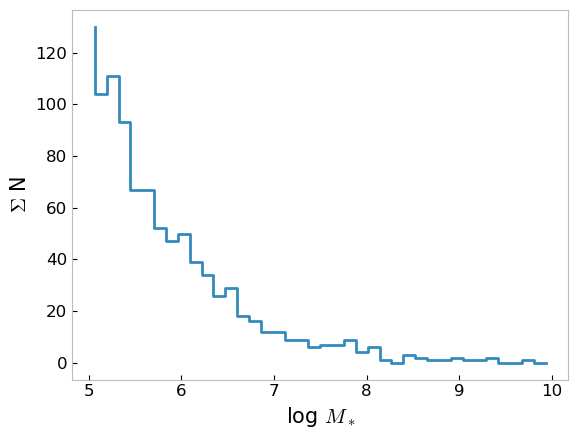

In [64]:
plt.step(bincenters, stack_counts)
plt.xlabel("log $M_*$", fontsize=15)
plt.ylabel("$\Sigma$ N", fontsize=15)
plt.show()

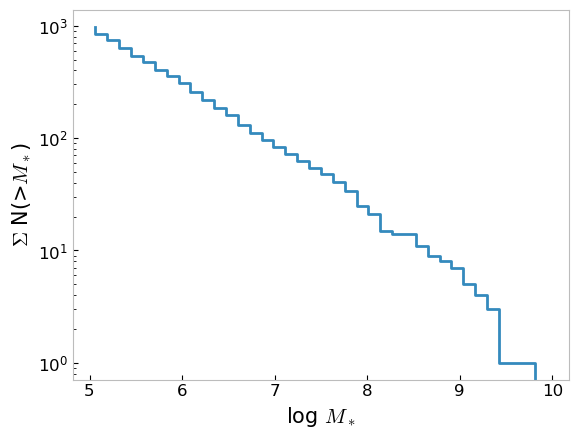

In [65]:
plt.step(bincenters, stack_cumulative)
plt.yscale("log")
plt.xlabel("log $M_*$", fontsize=15)
plt.ylabel("$\Sigma$ N(>$M_*$)", fontsize=15)
plt.show()

In [ ]:
plt.title("individual host realizations")
for i in range(20):
    if i ==0:
        plt.plot(bincenters, countz[i], color="orange",alpha=0.5, label="regular")
        plt.plot(bincenters, cumulative[i], color="grey",alpha=0.5, label="cumulative")
    else:    
        plt.plot(bincenters, countz[i], color="orange",alpha=0.5)
        plt.plot(bincenters, cumulative[i], color="grey",alpha=0.5)

plt.legend()
plt.xlabel("log $M_*$", fontsize=15)
plt.ylabel("N", fontsize=15)
plt.show()

In [ ]:
plt.title("individual host realizations")
for i in range(20):
    if i ==0:
        plt.plot(bincenters, countz[i], color="orange",alpha=0.5, label="regular")
        plt.plot(bincenters, cumulative[i], color="grey",alpha=0.5, label="cumulative")
    else:    
        plt.plot(bincenters, countz[i], color="orange",alpha=0.5)
        plt.plot(bincenters, cumulative[i], color="grey",alpha=0.5)

plt.legend()
plt.yscale("log")
plt.xlabel("log $M_*$", fontsize=15)
plt.ylabel("N", fontsize=15)
plt.show()

In [ ]:
N_real = 100
surveys = np.array(np.split(countz, N_real))
stacked = np.sum(surveys, axis=1)

surveys_cumulative = np.array(np.split(cumulative, N_real))
stacked_cumulative = np.sum(surveys_cumulative, axis=1)

In [ ]:
plt.title("survey realizations (100 hosts stacked)")
for i in range(20):
    if i ==0:
        plt.plot(bincenters, stacked[i], color="orange",alpha=0.5, label="regular")
        plt.plot(bincenters, stacked_cumulative[i], color="grey",alpha=0.5, label="cumulative")
    else:    
        plt.plot(bincenters, stacked[i], color="orange",alpha=0.5)
        plt.plot(bincenters, stacked_cumulative[i], color="grey",alpha=0.5)

plt.legend()
plt.xlabel("log $M_*$", fontsize=15)
plt.ylabel("$\Sigma_{100} $ N", fontsize=15)
plt.show()

In [ ]:
plt.title("survey realizations (100 hosts stacked)")
for i in range(20):
    if i ==0:
        plt.plot(bincenters, stacked[i], color="orange",alpha=0.5, label="regular")
        plt.plot(bincenters, stacked_cumulative[i], color="grey",alpha=0.5, label="cumulative")
    else:    
        plt.plot(bincenters, stacked[i], color="orange",alpha=0.5)
        plt.plot(bincenters, stacked_cumulative[i], color="grey",alpha=0.5)

plt.legend()
plt.yscale("log")
plt.xlabel("log $M_*$", fontsize=15)
plt.ylabel("$\Sigma_{100} $ N", fontsize=15)
plt.show()